# PROJECT 11: MACHINE LEARNING

### DESCRIPTION OF THE PROJECT:<BR>
 Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.<BR>

 I have access to behavior data about subscribers who have already switched to the new plans.<BR>
 
 For this classification task, I need to develop a model that will pick the right plan. Since I’ve already performed the data preprocessing step, I can move straight to creating the model.  

### GOAL OF THE PROJECT:<BR>

Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.  

***

### 1. IMPORT LIBRARIES.

In [16]:
# import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### 1. OPENING AND READING THE FILE.

In [17]:
# reading the csv file.
users = pd.read_csv('/Users/cesarchaparro/Desktop/TripleTen/Sprint_11/project/users_behavior.csv')
users

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


#### Columns are clean.<br>
#### 3214 Users.<br>
#### We can see that users with Ultra plan are assigned with 1, and the users with Smart plan are assigned with 0 on the column.

In [18]:
# info method to see types of data and missing values.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


#### Non missing values.

### 2. Exploratory Data Analysis.

In [19]:
# mean to see average values by plan group.
users.groupby(['is_ultra']).mean().T

is_ultra,0,1
calls,58.463437,73.392893
minutes,405.942952,511.224569
messages,33.384029,49.363452
mb_used,16208.466949,19468.823228


In [25]:
# calculate distribution by percentage by plan.
percentages = users.drop(columns = 'is_ultra').groupby(users['is_ultra']).sum() / users.drop(columns = 'is_ultra').sum() * 100
percentages.T

is_ultra,0,1
calls,64.319101,35.680899
minutes,64.246300,35.753700
messages,60.480672,39.519328
mb_used,65.325685,34.674315


#### Most of users belong to the Smart plan. We can see abobe on % for each plan.<br>
#### We can also see differences on each feature for each plan, they are nor balance on the behavior.

In [21]:
# describe method for each separate group plan for individual analysis.
for group in users['is_ultra'].unique():
    if group == 1:
        result = 'Ultra'
    else:
        result = 'Smart'
    print("Basic statistics for", result, "group")
    print("===============================================")
    display(users[users.is_ultra == group].describe())

Basic statistics for Smart group


,calls,minutes,messages,mb_used,is_ultra
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


Basic statistics for Ultra group


,calls,minutes,messages,mb_used,is_ultra
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


#### Correlation Matrix:<br>
#### It helps in identifying relationships between variables, detecting multicollinearity, reducing dimensionality, preprocessing data, gaining model insights, and detecting data issues. Understanding these correlations is foundational to building robust and interpretable machine learning model.

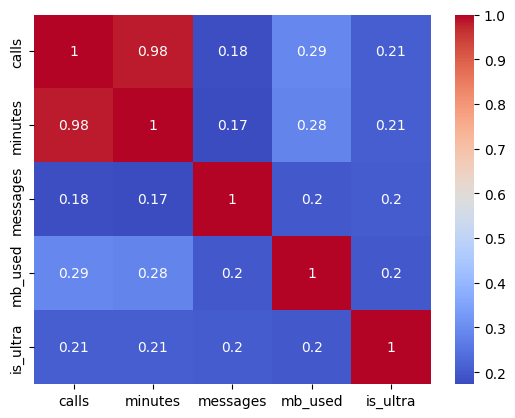

In [27]:
# calculate correlation matrix
correlation_matrix = users.corr()

# visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

#### The provided heatmap visualizes the correlation matrix among the variables: calls, minutes, messages, mb_used, and is_ultra. The color intensity represents the strength of the correlation, ranging from red (strong positive correlation) to blue (strong negative correlation).<br>

#### Calls and minutes exhibit a very strong positive correlation, as indicated by the intense red color. This suggests that users who make more calls tend to also have longer call durations.

#### Messages and minutes show a moderate positive correlation, implying that users who send more messages also tend to have longer call durations.<br>

#### There's a moderate positive correlation between mb_used and minutes, suggesting that users with higher data usage might also have longer calls.<br>

#### The relationship between calls, minutes, and messages with mb_used and is_ultra is relatively weak, as indicated by the lighter colors. This implies that these variables don't significantly influence data usage or ultra plan subscription.<br>

#### Since there are 2 features highly correlated, I will drop one of them on the below step.



In [35]:
# drop feature with highly correlated values.
clean_users = users.drop(['minutes'], axis=1)
clean_users

,calls,messages,mb_used,is_ultra
0,40.0,83.0,19915.42,0
1,85.0,56.0,22696.96,0
2,77.0,86.0,21060.45,0
3,106.0,81.0,8437.39,1
4,66.0,1.0,14502.75,0
...,...,...,...,...
3209,122.0,20.0,35124.90,1
3210,25.0,0.0,3275.61,0
3211,97.0,70.0,13974.06,0
3212,64.0,90.0,31239.78,0


### 3. Split the source data into a training set, a validation set, and a test set.<br>

### 60% training dataset.<br>
### 20% validating dataset.<br>
### 20% test dataset.

In [31]:
train, valid = train_test_split(clean_users, test_size = 0.4, random_state = 42)
valid_set, test_set = train_test_split(valid, test_size = 0.5, random_state = 42)

In [32]:
train.shape

(1928, 4)

### 60% for the training dataset is 1928.

In [33]:
valid.shape

(1286, 4)

In [34]:
display(valid_set.shape)
display(test_set.shape)

(643, 4)

(643, 4)

### 20% for the validating dataset is 643.<br>

### 20% for the test dataset is 643.

In [36]:
# divides a training dataset into features and a target variable.
features_train = train.drop('is_ultra', axis = 1)
target_train = train['is_ultra']
print(features_train.shape)
print(target_train.shape)

(1928, 3)
(1928,)


In [40]:
# divides a validation dataset into two parts: features and the target variable.
features_valid = valid_set.drop('is_ultra', axis = 1)
target_valid = valid_set['is_ultra']
print(features_valid.shape)
print(target_valid.shape)

(643, 3)
(643,)


In [39]:
# divides a test dataset into two parts: features and the target variable.
features_test = test_set.drop('is_ultra', axis = 1)
target_test = test_set['is_ultra']
print(features_test.shape)
print(target_test.shape)

(643, 3)
(643,)
